In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from simtk import openmm as mm

In [3]:
from uibcdf_tools.openmm import available_platforms, loading_failures

In [4]:
available_platforms()

Platform Reference with speed 1.0
Platform CPU with speed 10.0
Platform CUDA with speed 100.0
Platform OpenCL with speed 50.0


In [6]:
loading_failures()

()


## Tests

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from uibcdf_test_systems import FreeParticle
from uibcdf_test_systems.simulation import langevin_NVT
from simtk import unit

free_particle = FreeParticle(n_particles = 1, mass = 20.0 * unit.amu)

initial_positions =  np.zeros([1, 3], np.float32) * unit.nanometers
initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds

times, positions, velocities, kinetic_energies, potential_energies = langevin_NVT (free_particle.system,
                                                                                   temperature = 300*unit.kelvin,
                                                                                   friction = 10.0/unit.picoseconds,
                                                                                   initial_positions = initial_positions,
                                                                                   initial_velocities = initial_velocities,
                                                                                   integration_timestep = 0.1 * unit.picoseconds,
                                                                                   saving_timestep = 1.0 * unit.picoseconds,
                                                                                   total_time = 10 * unit.nanoseconds,
                                                                                   platform_name='CUDA')

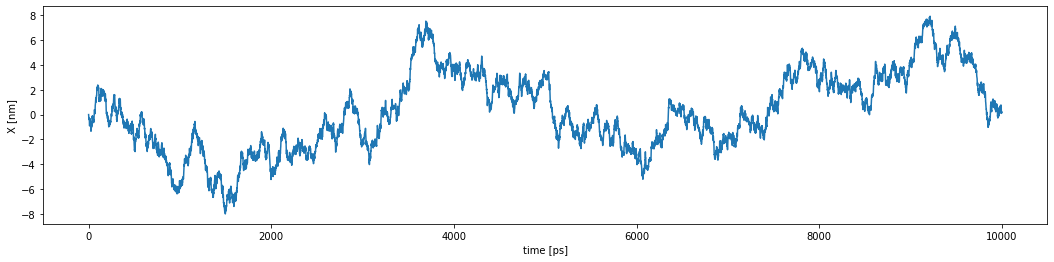

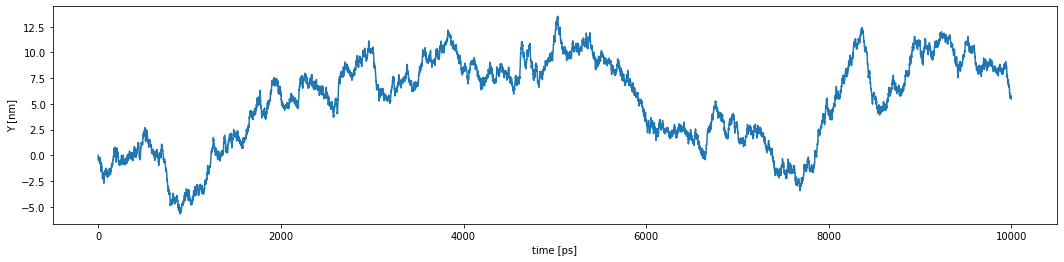

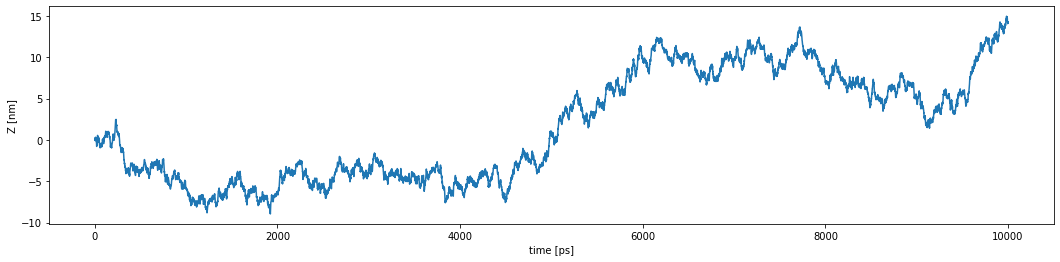

In [10]:
plt.rcParams['figure.figsize'] = 18, 4
for ii, ylabel in zip(range(3),['X','Y','Z']):
    plt.plot(times,positions[:,0,ii])
    plt.ylabel(ylabel+' [{}]'.format(positions.unit.get_symbol()))
    plt.xlabel('time [{}]'.format(times.unit.get_symbol()))
    plt.show()